# Calculating Gini coefficients for all countries and all years using a loop

In this part of the worksheet, we show you how to calculate the Gini coefficient for all countries and years in your dataset. This sounds like a tedious task, and indeed if we were to use the same method as before it would be mind-numbing. However, we have a powerful programming language at hand, and this is the time to use it.

In [ ]:
#@title
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
import io

!pip install plotnine
!pip install --upgrade plotnine

Also remember to set up and import the `inequalipy` package we used in the last worksheet.

In [ ]:
!pip install inequalipy
import inequalipy as ineq

Next, import the file from our previous worksheet:

In [ ]:
uploaded = files.upload()
decile_data = pd.read_excel(io.BytesIO(uploaded["GCIPrawdata.xlsx"]), skiprows = 2)

Saving GCIPrawdata.xlsx to GCIPrawdata.xlsx


Next, we use a very useful programming tool you may not have come across yet: loops. Loops are used to repeat a specified block of code. There are a few types of loop, and here we will use a ‘for’ loop, meaning that we ask Python to apply the same code to each number or item in a specific list (i.e. repeat the code ‘for’ a list of numbers/items). Let’s start with a very simple case: printing the first 10 square numbers. In coding terms, we are printing the values for `i^2` (`^` is expressed as `**` in Python) for the numbers `i = 1, ..., 10`.

In [ ]:
for i in range(1, 11):
    print(i ** 2)

In the above command, `range(1, 11)` is very much like the `np.arange` command you have seen before. (In fact, we could use either one here.) This creates a sequence of numbers from 1 to one less than the second number (so 1, 2, 3, …, 10). The command `for i in range(1, 11):` defines the variable `i` initially as 1, then performs all the commands that are moved over to the right ("indented") for each value of `i`. Typically these commands will involve the variable `i`. Here our command prints the value of `i^2` for each value of `i`.

**Exercise:** Check that you understand the syntax above. Then modify it to print only the first 5 square numbers or add 2 to the numbers from 1 to 10 (instead of squaring these numbers).

In [ ]:
for i in range(1,11):
    print(i+2)

Now we use loops to complete our task. We begin by creating a new column in our dataset, `gini`, which we initially set to 0 for all country-year combinations.

In [ ]:
decile_data["gini"] = 0

Now we use a loop to run through all the rows in our dataset (country-year combinations). For each row we will repeat the Gini coefficient calculation from the previous worksheet and save the resulting value in the `gini` variable we created.



In [ ]:
# give us the number of rows in decile_data
number_rows = len(decile_data)

for i in range(0, number_rows):
  # go to row i to get the decile data
  decs_i = decile_data.iloc[i, 2:12]
  decile_data.loc[i, "gini"] = ineq.gini(decs_i)

With this code, we calculated 4,799 Gini coefficients without having to manually run the same command 4,799 times. We now look at some summary measures for the `gini` column using the `describe` command.

In [ ]:
decile_data["gini"].describe()

In [ ]:
decile_data

,Country,Year,Decile 1 Income,Decile 2 Income,Decile 3 Income,Decile 4 Income,Decile 5 Income,Decile 6 Income,Decile 7 Income,Decile 8 Income,Decile 9 Income,Decile 10 Income,Mean Income,Population,gini
0,Afghanistan,1980,206,350,455,556,665,793,955,1187,1594,3542,1030,13211412,0.424313
1,Afghanistan,1981,212,361,469,574,686,818,986,1225,1645,3655,1063,12996923,0.424447
2,Afghanistan,1982,221,377,490,599,716,854,1029,1278,1717,3814,1109,12667001,0.424380
3,Afghanistan,1983,238,405,527,644,771,919,1107,1376,1848,4105,1194,12279095,0.424506
4,Afghanistan,1984,249,424,551,674,806,961,1157,1438,1932,4291,1248,11912510,0.424361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,Zambia,2010,35,88,139,197,267,357,482,680,1070,3860,717,13917439,0.626467
4795,Zambia,2011,37,90,143,203,275,368,497,701,1104,3983,740,14343526,0.626632
4796,Zambia,2012,38,94,149,210,285,381,515,726,1143,4123,766,14786581,0.626357
4797,Zambia,2013,39,97,154,218,295,394,533,751,1183,4268,793,15246086,0.626475


In [ ]:
russia=decile_data[decile_data.Country=='Russian Federation']
burundi=decile_data[decile_data.Country=='Burundi']
southafrica=decile_data[decile_data.Country=='South Africa']
indonesia=decile_data[decile_data.Country=='Indonesia']
indonesia

In [ ]:
russia

In [ ]:
burundi

In [ ]:
southafrica

In [ ]:
denmark = decile_data[decile_data.Country=='Denmark']
denmark

In [ ]:
from plotnine import *

In [ ]:
data_gini=decile_data[(decile_data.Country=="Denmark")|(decile_data.Country=="Russian Federation")|(decile_data.Country=="Burundi")|(decile_data.Country=="South Africa")]

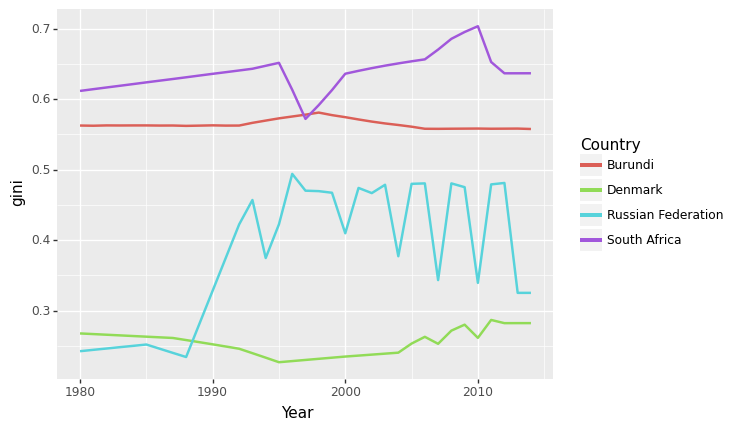

<ggplot: (8771549599321)>

In [ ]:
ggplot(data_gini, aes(x = "Year", y = "gini", color = "Country")) + geom_line(size = 1)

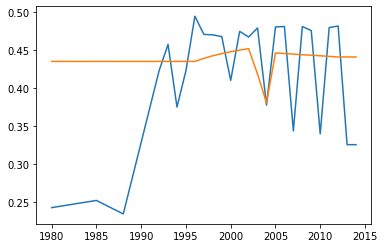

In [ ]:
plt.plot(russia['Year'],russia['gini'])
plt.plot(albania['Year'],albania['gini'])

The average Gini coefficient is 0.46, the maximum is 0.74, and the minimum 0.18. Let’s look at these extreme cases.

First, we will look at the extremely equal income distributions (those with a Gini coefficient smaller than 0.20):

In [ ]:
decile_data[decile_data["gini"] < 0.20]

**Exercise:** Now select the subset representing the most unequal countries (those with a Gini coefficient larger than 0.73).

In [ ]:
decile_data[decile_data.gini>0.73]

# Measuring other kinds of inequality

There are many ways to measure income inequality, but income inequality is only one dimension of inequality within a country. To get a more complete picture of inequality within a country, we need to look at other areas in which there may be inequality in outcomes.

In this section of the worksheet, we will look at how researchers have measured inequality in health-related outcomes. Besides income, health is an important aspect of wellbeing, partly because it determines how long an individual will be alive to enjoy his or her income. If two people had the same annual income throughout their lives, but one person had a much shorter life than the other, we might say that the distribution of wellbeing is unequal, despite annual incomes being equal.

As with income, inequality in life expectancy can be measured using a Gini coefficient. In the study [‘Mortality inequality’](https://tinyco.re/8593466), researcher Sam Peltzman (2009) estimated Gini coefficients for life expectancy based on the distribution of total years lived (life-years) across people born in a given year (birth cohort). If everybody born in a given year lived the same number of years, then the total years lived would be divided equally among these people (perfect equality). If a few people lived very long lives but everybody else lived very short lives, then there would be a high degree of inequality (Gini coefficient close to 1).

We will now look at mortality inequality Gini coefficients for 10 countries around the world. First, download the data:

* Go to the [‘Health Inequality’ section](https://tinyco.re/2668264) of the Our World in Data website. In Mortality Inequality section, click the ‘Download’ button at the bottom of the chart shown.
* Click the blue button that appears to download the data in csv format.

## Importing `.csv` files into Python

We will first import the data into Python and assign it to a variable called `health_in`.

In [ ]:
uploaded = files.upload()
health_in = pd.read_csv(io.BytesIO(uploaded["inequality-of-life-as-measured-by-mortality-gini-coefficient-1742-2002.csv"]))

**Exercise:** Print the data to investigate its the structure.

In [ ]:
health_in

,Entity,Code,Year,Gini coefficients for lifetime inequality (Peltzman (2009))
0,Brazil,BRA,1892,0.565620
1,Brazil,BRA,1897,0.556550
2,Brazil,BRA,1902,0.547480
3,Brazil,BRA,1907,0.482472
4,Brazil,BRA,1912,0.494322
...,...,...,...,...
315,United States,USA,1982,0.119053
316,United States,USA,1987,0.117460
317,United States,USA,1992,0.115319
318,United States,USA,1997,0.110711


The variable `Entity` is the country and the variable `X.percent` is the health Gini. Let's change these variable names (to `Country` and `Health`, respectively) to clarify what they actually refer to, which will help when writing code (and if we go back to read this code at a later date).

To do so, we use `health_in.columns` (which refers to the columns of our data set) and assign to it a list containing our desired column names. The number of column names in this list has to match the number of columns in the data set.

**Exercise:** Rename the columns in the data set as `"Country"`, `"Code"`, `"Year"`, and `"HGini"`.

In [ ]:
health_in.columns = ['Country','Code','Year','HGini']
health_in

There is another quirk in the data that you may not have noticed in this initial data inspection: All countries have a short code (`Code`), except for England and Wales (currently blank `""` in the data). We change the blanks to `"ENW"` as follows:

In [ ]:
health_in.loc[health_in["Code"].isna(), "Code"] = "ENW"

Here, we are selecting all rows where data in the `Code` column is missing (using the `isna()` function) and then set the value in the `Code` column to `ENW`.

# Creating line graphs with `ggplot`

We will now use the mortality inequality data to plot all the countries on the same line chart, with Gini coefficient on the vertical axis and year (1952–2002 only) on the horizontal axis.

There are many ways to plot data in Python, one being the standard plotting function (`plot`) we used in previous examples. Another (and perhaps more beautiful) way is to use the `ggplot` function, which is part of the `plotnine` package. Our dataset is already in a format which the `ggplot` function can easily use.

First, we need to import the `plotnine` package.

In [ ]:
from plotnine import *

**Exercise:** Select all data after 1951 and assign this to a new variable called `temp_data`.

In [ ]:
temp_data=health_in[(health_in.Year>1951)]

Now we plot the data using `ggplot`.

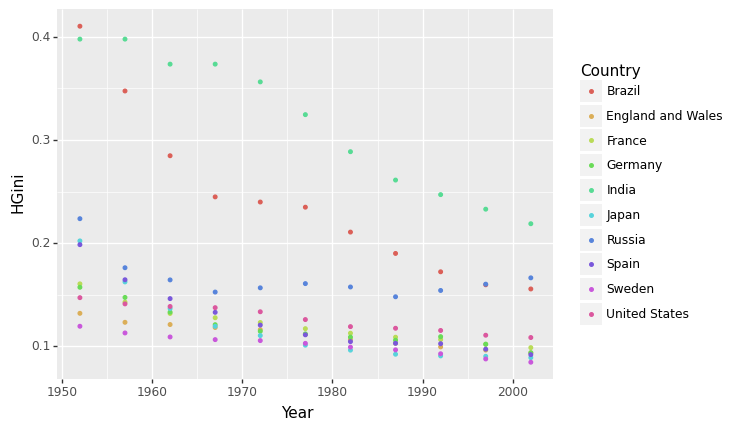

<ggplot: (8771548256057)>

In [ ]:
ggplot(temp_data, aes(x = "Year", y = "HGini", color = "Country")) + geom_point(size = 1)

Here, we asked the `ggplot` function to use `temp_data`, with `Year` on the horizontal axis (`x = `) and `gini` on the vertical axis (`y = `). The `color` option indicates which variable we use to separate the data (use a different line for each unique item in `Country`). The `+ geom_line(size = 1)` then instructs Python to draw points.

**Exercise:** See what happens if you replace `+ geom_point(size = 1)` with `+ geom_line(size = 1)`.

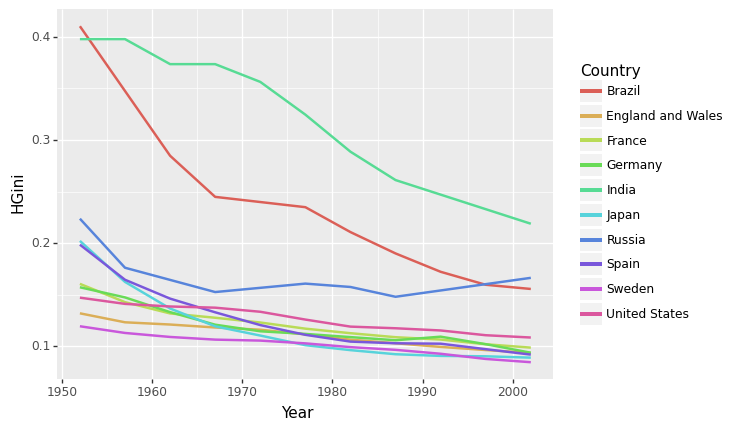

<ggplot: (8771548208805)>

In [ ]:
ggplot(temp_data, aes(x = "Year", y = "HGini", color = "Country")) + geom_line(size = 1)

The resulting graph already looks pretty good, but the colors are a little hard to distinguish and we are missing a label on the y-axis as well as a title. The following command addresses this.

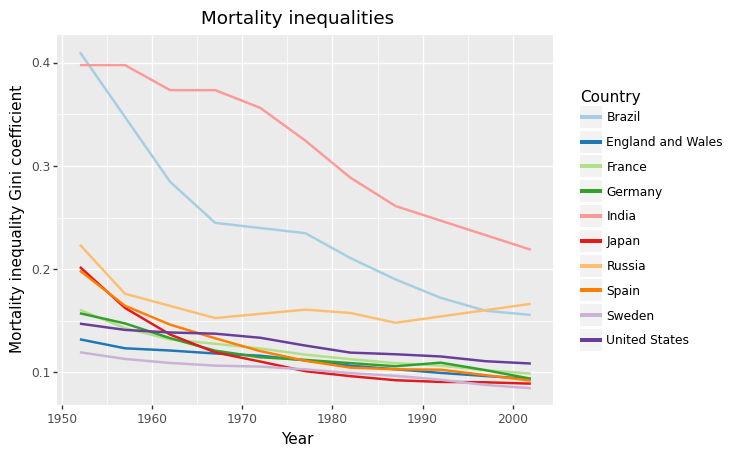

<ggplot: (8771548284609)>

In [ ]:
ggplot(temp_data, aes(x = "Year", y = "HGini", color = "Country")) + geom_line(size = 1) + labs(y = "Mortality inequality Gini coefficient", title = "Mortality inequalities") + scale_color_brewer(type = "qual", palette = "Paired")

We added the option `labs` to change the vertical axis label (`y = `) and the option `scale_color_brewer` to change the colour palette (to clearly differentiate the lines for each country).

The `ggplot` fucntion is extremely powerful, and if you want to produce a variety of different charts, you may want to read more about that package. For example, see a [Monash Python tutorial](https://monashdatafluency.github.io/python-workshop-base/modules/plotting_with_ggplot/) for great examples that include code.

## Drawing a column chart with sorted values

Now we will compare the Gini coefficients in the first year of your line chart (1952) with the last year (2002).

### Plot a column chart for 1952

First, we will sort the countries for the year 1952 according to their mortality inequality Gini coefficient from smallest to largest. Then, we will plot a column chart showing these Gini coefficients on the vertical axis, and country on the horizontal axis.

**Exercise:** Select the data for 1952 only and assign it to the variable `temp_data`.

In [ ]:
temp_data=health_in[health_in.Year==1952]

Then we can use the `sort_values` command to, well, sort the values according to a specific column.

In [ ]:
temp_data = temp_data.sort_values("HGini")

**Exercise:** As usual, convince yourself that this operation was successful.

In [ ]:
temp_data

The rows are now ordered according to HGini, in ascending order. Let’s use `ggplot` again.

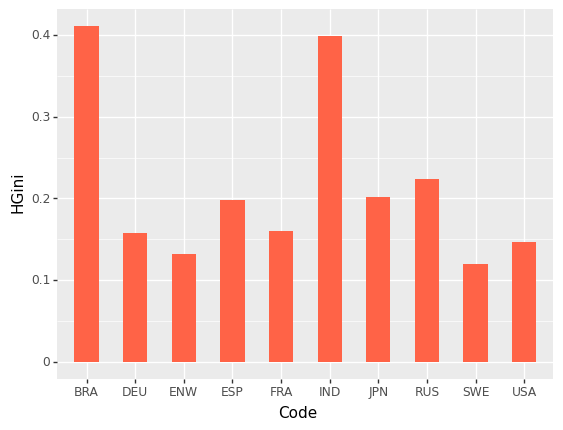

<ggplot: (8771546503873)>

In [ ]:
ggplot(temp_data, aes(x = "Code", y = "HGini")) + geom_bar(stat = "identity", width = .5, fill = "tomato")

Notice that we are using the `geom_bar` setting here instead. However, the columns are unfortunately not ordered correctly, because `ggplot` used the ordering of the `Code` column. We can correct this using the `reorder` command.

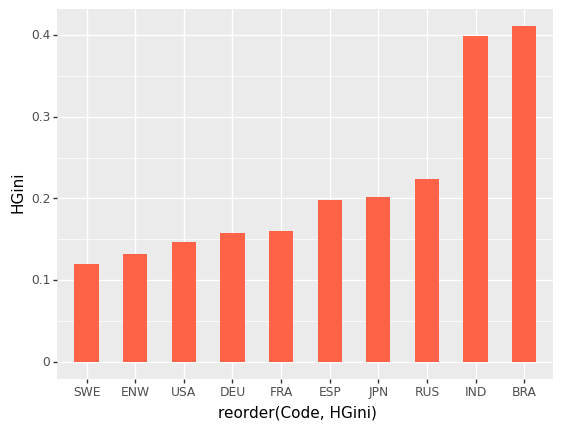

<ggplot: (8771537534793)>

In [ ]:
ggplot(temp_data, aes(x = "reorder(Code, HGini)", y = "HGini")) + geom_bar(stat = "identity", width = .5, fill = "tomato")

**Exercise:** Run ``ggplot`` again and add `Mortality Gini coefficients (1952)` as a title, `Country` as a label on the x-axis, and `Mortality inequality Gini coefficient` as a label on the y-axis.

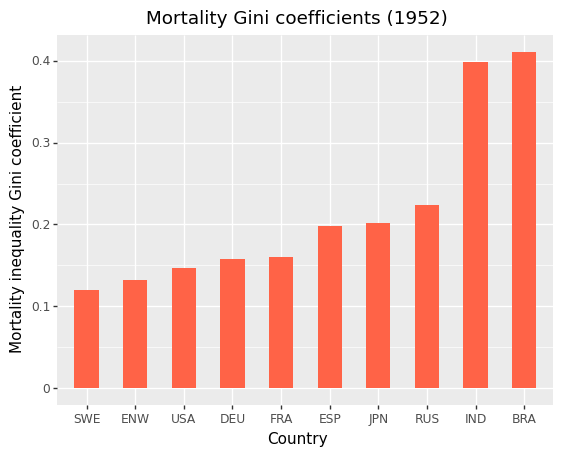

<ggplot: (8771537505485)>

In [ ]:
ggplot(temp_data, aes(x = "reorder(Code, HGini)", y = "HGini")) + geom_bar(stat = "identity", width = .5, fill='tomato') + labs(x='Country',y='Mortality inequality Gini coefficient',title='Mortality Gini coefficients (1952)')

### Plot a column chart for 2002

**Exercise:** Repeat the steps above for the year 2002 and compare the results.

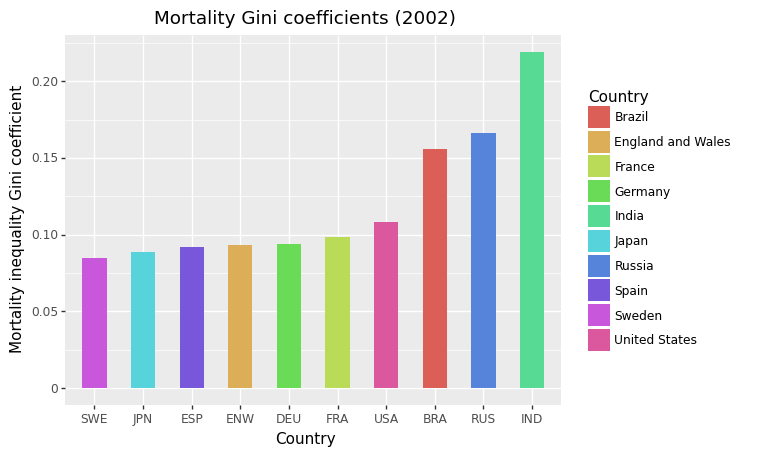

<ggplot: (8771537454449)>

In [ ]:
temp_data=health_in[health_in.Year==2002]
temp_data = temp_data.sort_values("HGini")
ggplot(temp_data, aes(x = "reorder(Code, HGini)", y = "HGini", fill='Country')) + geom_bar(stat = "identity", width = .5) + labs(x='Country',y='Mortality inequality Gini coefficient',title='Mortality Gini coefficients (2002)')

## Optional: Plot a column chart for both years

We can also plot the data for both years in the same chart by extracting both years into the same temporary dataset.

**Exercise:** Select the data for the years 1952 and 2002 and, as before, assign it to the variable `temp_data`.

In [ ]:
temp_data=health_in[(health_in.Year==1952)|(health_in.Year==2002)]
temp_data

In [ ]:
temp52=health_in[(health_in.Year==1952)]
temp02=health_in[(health_in.Year==2002)]
temp52.sort_values('HGini')

In [ ]:
temp02.sort_values('HGini')

Next, run the code below to create the graph.

In [ ]:
p=ggplot(temp_data, aes(x = "reorder(Code, HGini)", y = "HGini", fill = 'factor(Year)')) + geom_bar(position="dodge", stat = "identity")

Now the country ordering is in terms of the average `HGini`, rather than `HGini` in 1952 (which might have made comparisons easier).

**Exercise:** Finally, add an appropriate title, as well as labels for both axes.

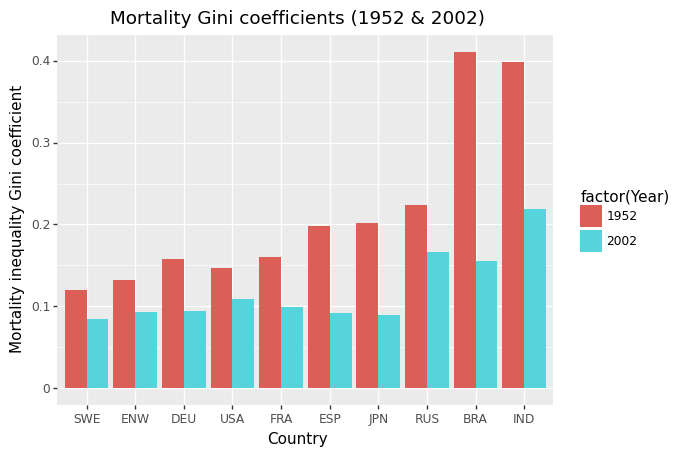

<ggplot: (8771537480925)>

In [ ]:
p+labs(x='Country',y='Mortality inequality Gini coefficient',title='Mortality Gini coefficients (1952 & 2002)')